# Exercise 10.2 (Newton's method for root finding)

Newton's method can be used to find a root $x$ of a function $f(x)$ such that

$$
f(x) = 0
$$

A Taylor series expansion of $f$ about $x_{i}$ reads:

$$
f(x_{i+1}) = f(x_{i}) + \left. f^{\prime} \right|_{x_{i}} (x_{i+1} - x_{i}) +  O((x_{i+1} - x_{i})^{2})
$$


If we neglect the higher-order terms and set $f(x_{i+1})$ to zero, we have Newton's method:

\begin{align}
x_{i + 1} &= - \frac{f(x_{i})}{f^{\prime}(x_{i})} + x_{i}
\\
x_{i} &\leftarrow x_{i+1}
\end{align}

In Newton's method, the above is applied iteratively until $\left|f(x_{i + 1})\right|$ is below a tolerance value.

In [1]:
# Import numpy module
import numpy as np

# Import pytest module for exception testing
import pytest

# Import modules for plotting
import matplotlib
import matplotlib.pyplot as plt

# Configure plots to appear inline in Jupyter notebook
%matplotlib inline

## Task:

Develop an implementation of Newton's method, where `f` is the mathematical function, `df` is the first derivative function, `x0` is the initial guess, `tol` is the stopping tolerance, and `max_it` is the maximum number 
of iterations.

Your implementation should raise an exception if the maximum number of iterations (`max_it`)
is exceeded.

In [2]:
def newton(f, df, x0, tol, max_it, verbose=False):
    """ Implement Newton's method of finding root for a mathematical function
    
        Arguments:
            * f = mathematical function for evaluating x, aka f(x)
            * df = derivative function for f(x), aka df(x)
            * x0 = initial guess for starting iterations
            * tol = acceptable function value distance from 0 for stopping iterations
            * max_it = maximum number of iterations before stopping
            
        Returns:
            * x1 = Newton's method calculation for function root
    """
    # Initialize iteration value to 0, x1 to initial guess
    iterations = 0
    x1 = x0
    
    # Iterate through Newton's method until reaching tolerance level or maximum iterations
    while (abs(f(x1)) > tol):
        if iterations > max_it:
            raise ValueError("Maximum number of iterations exceeded")
        if df(x1) == 0:
            raise ZeroDivisionError("Function derivative cannot equal zero")
        x1 = -(f(x1) / df(x1)) + x1
        if verbose:
            print("x = {}, f(x) = {}".format(x1, f(x1)))
        iterations += 1
    
    # Return root as calculated by Newton's method
    return x1

## Assignment:

Use your program to find the roots of:
    
$$
f(x) = \tan(x) - 2x
$$

near $x = 1.2$

### Define mathematical function $f(x) = tan(x) - 2x$

In [3]:
# Define mathematical function
def f(x):
    # Evaluate function at x and return value
    return np.tan(x) - (2 * x)

### Define first derivative of mathematical function $f'(x) = sec^2(x) - 2$

#### Note: For programmatic ease, this function is equivalent to $f'(x) = 1/cos(x)^2 - 2$

In [4]:
# Define derivative of mathematical function
def df(x):
    # Evaluate df/dx at x and return value
    return (1 / np.cos(x)**2) - 2

### Test with valid inputs

In [5]:
# Test using parameter x = -1.2
root1 = newton(f, df, -1.2, 1.0e-6, 100)
root1

-1.1655611930408862

In [6]:
# Test using parameter x = 0
root2 = newton(f, df, 0, 1.0e-6, 100)
root2

0

In [7]:
# Test using parameter x = 1.2
root3 = newton(f, df, 1.2, 1.0e-6, 100)
root3

1.1655611930408862

### Test that invalid inputs get caught (using pytest)

#### Note: ZeroDivisionError will not be raised in this case, as this only occurs when the tolerance has already passed and returned from function

In [8]:
# Check that restricted number of iterations ValueError
with pytest.raises(ValueError):
    newton(f, df, 1.2, 1.0e-6, 1)

### Plot $f(x)$ and $f^{\prime}(x)$ on the same graph between $-\pi/2$ and $\pi/2$, and show the roots computed by Newton's method.

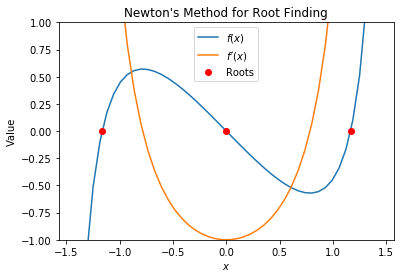

In [9]:
# Define number space for plotting
num_points = 50
x = np.linspace(-np.pi/2, np.pi/2, num = num_points)

# Plot f(x) and df(x), and add label for each
plt.plot(x, f(x), label="$f(x)$")
plt.plot(x, df(x), label="$f'(x)$")

# Plot calculated roots
plt.plot([root1, root2, root3], [0, 0, 0], 'ro', label="Roots")

# Label the graph
plt.xlabel('$x$')
plt.ylabel('Value')
plt.title("Newton's Method for Root Finding")

# Add legend
plt.legend()

# Define plot limits
plt.ylim(-1, 1);
plt.xlim(x[0], x[-1]);

Newton's method can be sensitive to the starting value. What happens if you start at $x = 0.9$? It may help to add a print statement in the iteration loop, showing $x$ and $f$ at each iteration.

* Note: $x = 0.9$ is too far from a true root, causing the algorithm to fluctuate wildly and veer farther from the correct answer

In [10]:
# Run Newton's method starting at x = 0.9
with pytest.raises(ValueError):
    newton(f, df, 0.9, 1.0e-6, 10, verbose=True)

x = 1.8181002473542383, f(x) = -7.597035324185375
x = 2.3353201132969303, f(x) = -5.713285365321914
x = 67.92318000585634, f(x) = -138.35777585317194
x = 93.99295831480038, f(x) = -188.2464005596422
x = -107.95606253109432, f(x) = 213.72523809054803
x = -164.46013967152396, f(x) = 326.96846893752263
x = -280.8370883130485, f(x) = 558.8058096058801
x = -358.1533857040006, f(x) = 716.2949476622929
x = 358.2417146829099, f(x) = -716.3829409857734
x = -365.4489932132657, f(x) = 729.2542489118345
x = -793.9499692156928, f(x) = 1589.092436571932


### Extension (optional)

For a complicated function we might not know how to compute the derivative, or it may be very complicated
to evaluate. Write a function that computes the *numerical derivative* of $f(x)$ by evaluating 
$(f(x + dx) - f(x - dx)) / (2dx)$, where $dx$ is small. How should you choose $dx$?

In [11]:
# Define numeric derivative of mathematical function
def numeric_df(x):
    # Evaluate df/dx at x and return value
    dx = 0.01
    return (f(x + dx) - f(x - dx)) / (2 * dx)

In [12]:
# Test using parameter x = 1.2
newton(f, numeric_df, 1.2, 1.0e-6, 100)

1.1655612379180718